<h1 style="color:lime;font-weight:1000;">Model to predict Resturant Rating<h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv("Dataset .csv")

In [3]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
# lets check for duplicates
df.duplicated().sum()

0

In [7]:
# let check for null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<h2 style="color:red;font-weight:bold">Data Analysis [EDA]<h2>

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

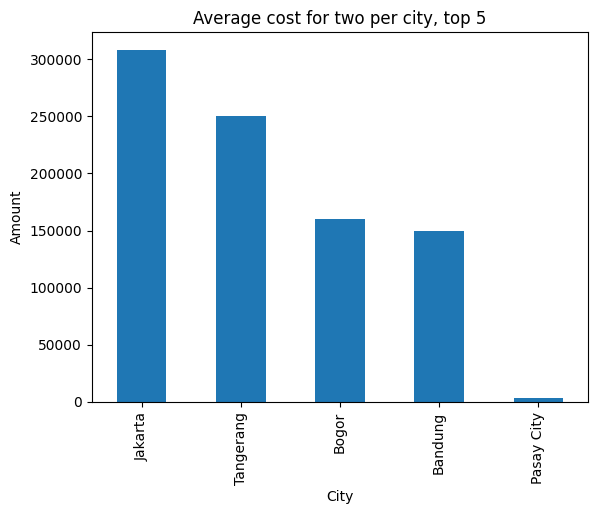

In [9]:
# group byt city and calculate average cost
df.groupby("City")['Average Cost for two'].mean().sort_values(ascending= False).head().plot(kind= 'bar')
plt.title("Average cost for two per city, top 5")
plt.ylabel("Amount")
plt.show()

In [10]:
# cuisies total number of votes
data  = df.groupby("Cuisines")["Votes"].sum().reset_index()

In [11]:
data[data["Votes"] == 0]

,Cuisines,Votes
2,"Afghani, North Indian",0
164,"Awadhi, Mughlai",0
185,"Bakery, Chinese, North Indian",0
193,"Bakery, Desserts, Fast Food, Mithai",0
208,"Bakery, Healthy Food",0
213,"Bakery, North Indian",0
214,"Bakery, Pizza",0
224,"Bengali, Chinese",0
234,"Beverages, Healthy Food",0
323,"Burger, Pizza, Fast Food",0


In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

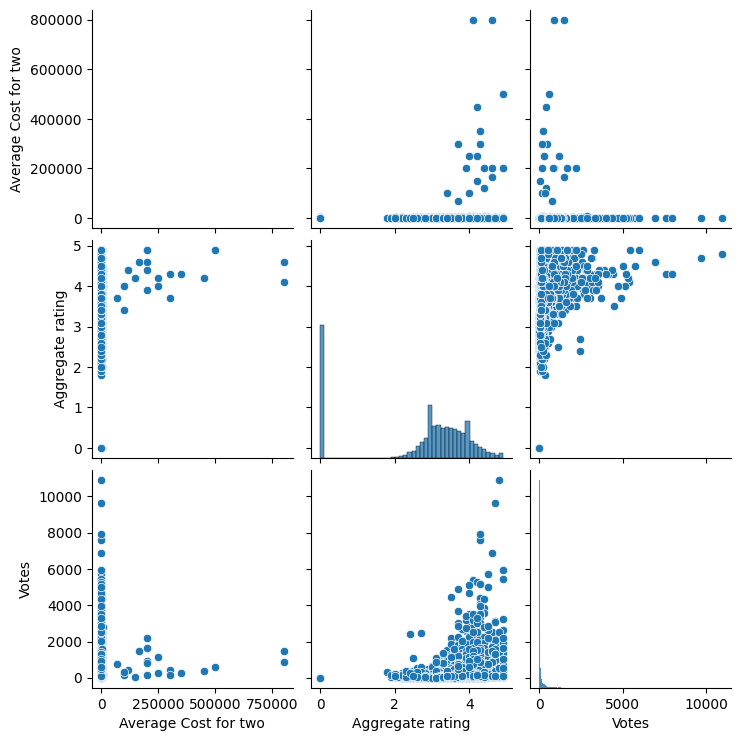

In [13]:
sns.pairplot(df[["Average Cost for two","Aggregate rating","Votes"]])
plt.show()

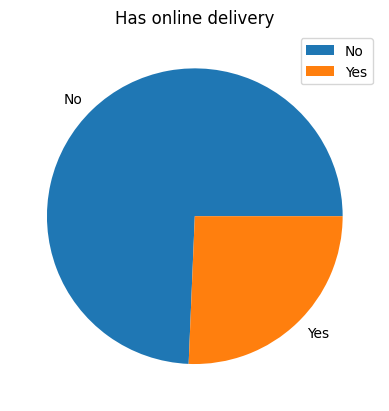

In [14]:
df["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("Has online delivery")
plt.ylabel("")
plt.legend()

In [15]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [16]:
df[["Aggregate rating","Rating text"]].sort_values(by="Aggregate rating", ascending=False)

,Aggregate rating,Rating text
1381,4.9,Excellent
589,4.9,Excellent
374,4.9,Excellent
9303,4.9,Excellent
9299,4.9,Excellent
...,...,...
4034,0.0,Not rated
4033,0.0,Not rated
4029,0.0,Not rated
4025,0.0,Not rated


In [17]:
#  new data frame with only rated values
df = df[df["Rating text"]!= "Not rated"]

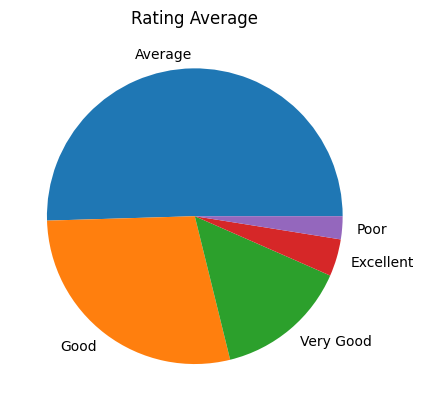

In [18]:
df["Rating text"].value_counts().plot(kind="pie")
plt.title("Rating Average")
plt.ylabel("")
plt.show()

<h2 style="color:red;font-weight:bold">Time to build some Models<h2>

In [19]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [20]:
x = df[['Average Cost for two','Has Table booking','Has Online delivery','Price range']]

In [21]:
# Above 2 below 2.5 poor
# Above 2.5 below 3.5 Average
# Above 3.5 below 4.0 Good
# Above 4 below 4.5 Very Good
# Above 4.5

In [22]:
y = df['Aggregate rating']

In [23]:
x

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [24]:
x["Price range"].value_counts()

Price range
1    2744
2    2711
3    1373
4     575
Name: count, dtype: int64

In [25]:
from sklearn import preprocessing 

<h4 style="color:lime;font-weight:500">Label encoding<h4>

In [26]:
# time to change obj to numerical value
label_encoder = preprocessing.LabelEncoder()

In [27]:
x["Has Table booking_transfomred"]  = label_encoder.fit_transform(x["Has Table booking"]) 

C:\Users\personal\AppData\Local\Temp\ipykernel_15764\4291529304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Has Table booking_transfomred"]  = label_encoder.fit_transform(x["Has Table booking"])


In [28]:
x

,Average Cost for two,Has Table booking,Has Online delivery,Price range,Has Table booking_transfomred
0,1100,Yes,No,3,1
1,1200,Yes,No,3,1
2,4000,Yes,No,4,1
3,1500,No,No,4,0
4,1500,Yes,No,4,1
...,...,...,...,...,...
9546,80,No,No,3,0
9547,105,No,No,3,0
9548,170,No,No,4,0
9549,120,No,No,4,0


In [29]:
x["Has Online delivery_transformed"] = label_encoder.fit_transform(x["Has Online delivery"])

C:\Users\personal\AppData\Local\Temp\ipykernel_15764\3284152501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Has Online delivery_transformed"] = label_encoder.fit_transform(x["Has Online delivery"])


In [30]:
x

,Average Cost for two,Has Table booking,Has Online delivery,Price range,Has Table booking_transfomred,Has Online delivery_transformed
0,1100,Yes,No,3,1,0
1,1200,Yes,No,3,1,0
2,4000,Yes,No,4,1,0
3,1500,No,No,4,0,0
4,1500,Yes,No,4,1,0
...,...,...,...,...,...,...
9546,80,No,No,3,0,0
9547,105,No,No,3,0,0
9548,170,No,No,4,0,0
9549,120,No,No,4,0,0


<h4 style="color:lime;font-weight:500">Feature Scaling<h4>

since we've turned the object to numerical value let drop them

In [31]:
x.drop(columns=["Has Table booking","Has Online delivery"],inplace= True)

C:\Users\personal\AppData\Local\Temp\ipykernel_15764\171939337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=["Has Table booking","Has Online delivery"],inplace= True)


In [32]:
scaler = preprocessing.StandardScaler()

In [33]:
x = scaler.fit_transform(x)

In [34]:
x

array([[-0.0190367 ,  1.10671644,  2.37978283, -0.68302371],
       [-0.0135729 ,  1.10671644,  2.37978283, -0.68302371],
       [ 0.13941344,  2.18135204,  2.37978283, -0.68302371],
       ...,
       [-0.06985002,  2.18135204, -0.42020641, -0.68302371],
       [-0.07258191,  2.18135204, -0.42020641, -0.68302371],
       [-0.07613338,  0.03208084, -0.42020641, -0.68302371]])

<h4 style="color:lime;font-weight:500">Let split our data set<h4>

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

<h4 style="color:lime;font-weight:500">Lets import metrics we'll use in checking the quality of our model<h4>   

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [38]:
def model_result(predictions):
    print(f"Mean absolute error on this model is {mean_absolute_error(y_test,predictions)}")
    print(f"Root mean error on this model is {np.sqrt(mean_squared_error(y_test,predictions))}")

<h4 style="color:lime;font-weight:500">Linear Regression<h4>

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr =LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
prediction_lr = lr.predict(x_test)
prediction_lr

array([3.2238831 , 3.88510454, 3.22396689, ..., 3.88460185, 3.15840761,
       3.75701201])

In [43]:
# let check the model quality and result
model_result(prediction_lr)

Mean absolute error on this model is 0.3843716853757863
Root mean error on this model is 0.48967120707904205


<h4 style="color:lime;font-weight:500">SVR<h4>

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [45]:
svr = SVR()

In [46]:
params_gridsvr = {"C":[0.1,0.5],"kernel":["linear","poly"],"degree":[2]}

In [47]:
gridsvr = GridSearchCV(svr,params_gridsvr)

In [48]:
gridsvr.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [49]:
predicted_svr = gridsvr.predict(x_test)

In [50]:
model_result(predicted_svr)

Mean absolute error on this model is 0.3822802307056756
Root mean error on this model is 0.49158230875884906


<h4 style="color:lime;font-weight:500">DecisionTreeRegressor<h4>

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
param_grid = {
    "max_depth":[10,30],
    "min_samples_leaf":[1,2],
    "min_samples_split":[2,5]
}

In [53]:
tree_model = DecisionTreeRegressor()

In [54]:
grid_tree = GridSearchCV(estimator=tree_model,param_grid=param_grid)

In [55]:
grid_tree.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [56]:
predicted_tree = grid_tree.predict(x_test)

In [57]:
model_result(predicted_tree)

Mean absolute error on this model is 0.3479793400794322
Root mean error on this model is 0.44467662708472006


<h4 style="color:lime;font-weight:500">RandomForestRegressor<h4>

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfrmodel = RandomForestRegressor()

In [60]:
param_gridrfr = {"max_depth":[5,15],"n_estimators": [2,5,10]}

In [61]:
gridrfr = GridSearchCV(rfrmodel,param_gridrfr)

In [62]:
gridrfr.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [63]:
predicted_rfr = gridrfr.predict(x_test)

In [64]:
model_result(predicted_rfr)

Mean absolute error on this model is 0.3426177217648735
Root mean error on this model is 0.44059034826185783


In [65]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

<h4 style="color:lime;font-weight:500">KNeighborsRegressor<h4>

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [67]:
knn = KNeighborsRegressor()

In [68]:
knn_param_grid = {"n_neighbors":[9,11,13,15,17,19]}

In [69]:
knn_grid_search = GridSearchCV(knn,knn_param_grid)

In [70]:
knn_grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 11, 13, 15, 17, 19]})

In [71]:
predicted_knn = knn_grid_search.predict(x_test)

In [72]:
model_result(predicted_knn)

Mean absolute error on this model is 0.35500655360050837
Root mean error on this model is 0.45201082707627915


In [73]:
knn_grid_search.best_params_

{'n_neighbors': 17}

<h4 style="color:lime;font-weight:500">AdaBoostRegressor<h4>

In [74]:
from sklearn.ensemble import AdaBoostRegressor

In [75]:
ada = AdaBoostRegressor()

In [76]:
ada_parms_grid ={
    "n_estimators":[50,100,200],
    "learning_rate":[0.1,0.5,1]
}

In [77]:
ada_grid_search = GridSearchCV(ada,ada_parms_grid)

In [78]:
ada_grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [79]:
predicted_ada = ada_grid_search.predict(x_test)

In [80]:
model_result(predicted_ada)

Mean absolute error on this model is 0.3553961396832044
Root mean error on this model is 0.4526744660720358


In [81]:
ada_grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

#### were are choseing the gridrfr model

In [82]:
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [83]:
import joblib

In [84]:
# args first the model then the file you want it to be saved in
#  joblib and pkl are common file extension used
joblib.dump(gridrfr,"mlmodel.pkl")

['mlmodel.pkl']

In [85]:
scaler

StandardScaler()

In [86]:
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']